In [109]:
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
def data_process(df:pd.DataFrame,lap_df:pd.DataFrame)-> pd.DataFrame:
    # df.rename(columns = {'position':'final position'}, inplace = True)
    position_df= df[["raceId", "driverId", "positionOrder"]]
    joined_table = lap.merge(position_df, on = ["raceId", "driverId"], how = "left")
    joined_table["time"]= joined_table["time"].str.split(':')
    # new df from the column of lists
    split_df = pd.DataFrame(joined_table["time"].tolist(), columns=['lap_minutes', 'lap_seconds','none'])
    # concat df and split_df
    joined_table = pd.concat([joined_table, split_df], axis=1)
    joined_table["positionOrder"] = joined_table["positionOrder"] .astype(int)
    joined_table["lap_minutes"] = joined_table["lap_minutes"] .astype(int)
    joined_table["lap_second"] = joined_table["lap_minutes"] .astype(float)
    #since most of the time spend for each lap is below 5 minutes, we assumed that the time spent greater than 5 minutes should be caused by accidents rather than strategy. Thus, we focus on lap with time spend less than 6 minutes.
    li=[1,2,3,4,5]
    df_filtered = joined_table[joined_table['lap_minutes'].isin(li)]
    df_filtered["lap_time"] = " "
    sec = []
    for time_list in df_filtered["time"]:
        if time_list[0] == "1":
            second= 60 + float(time_list[1])
            sec.append(second)
        elif time_list[0] == "2":
            second = 120 + float(time_list[1])
            sec.append(second)
        elif time_list[0] == "3":
            second = 180 + float(time_list[1])
            sec.append(second)
        elif time_list[0] == "4":
            second = 240 + float(time_list[1])
            sec.append(second)
        elif time_list[0] == "5":
            second = 300 + float(time_list[1])
            sec.append(second)
    df_filtered["lap_time"] = sec
    # df_group = df_filtered.groupby(["raceId","driverId",'positionOrder'], as_index=False)["lap_time"].std()
    df_group = df_filtered.groupby(['positionOrder'], as_index=False)["lap_time"].std()
    df_group.sort_values(by=['positionOrder'], inplace=True)
    df_group.rename(columns = {'lap_time':'lap_time_STD'}, inplace = True)
    return df_group

In [111]:
def barchart_lapspeed(df: pd.DataFrame)-> plt:
    df.plot.bar(x='positionOrder', y='lap_time_STD', fontsize='9')
    plt.show()

In [112]:
# Load data
result = pd.read_csv("data/results.csv")
lap = pd.read_csv("data/lap_times.csv")

In [113]:
# Process the data files
df_group = data_process(result, lap)

<ipython-input-110-74199e8153e3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["lap_time"] = " "
<ipython-input-110-74199e8153e3>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["lap_time"] = sec


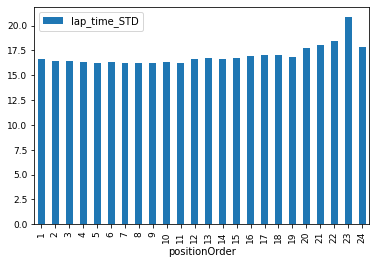

In [114]:
barchart_lapspeed(df_group)